# This file contains calls to 911 (emergency calls) in Montgomery County Pennsylvania.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('E:/datasets/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627057 entries, 0 to 627056
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        627057 non-null  float64
 1   lng        627057 non-null  float64
 2   desc       627057 non-null  object 
 3   zip        550638 non-null  float64
 4   title      627057 non-null  object 
 5   timeStamp  627057 non-null  object 
 6   twp        626788 non-null  object 
 7   addr       627057 non-null  object 
 8   e          627057 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 31.1+ MB


In [5]:
df.isnull().sum()/627057

lat          0.000000
lng          0.000000
desc         0.000000
zip          0.121869
title        0.000000
timeStamp    0.000000
twp          0.000429
addr         0.000000
e            0.000000
dtype: float64

##### Top 5 ZIP codes for 911 calls

In [6]:
df['zip'].value_counts().head()

19401.0    42731
19464.0    41266
19403.0    32831
19446.0    30429
19406.0    21301
Name: zip, dtype: int64

##### Top 5 Townships for 911 calls

In [7]:
df['twp'].value_counts().head()

LOWER MERION    52791
ABINGTON        37783
NORRISTOWN      35184
UPPER MERION    34307
CHELTENHAM      28916
Name: twp, dtype: int64

##### How many unique Title codes are there in the Title column(Title of the issue reported)

In [8]:
df['title'].nunique()

147

##### Most reported case Titles

In [9]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    143187
Traffic: DISABLED VEHICLE -     46037
Fire: FIRE ALARM                35930
EMS: FALL VICTIM                32244
EMS: RESPIRATORY EMERGENCY      31997
Name: title, dtype: int64

#### Create a default dictionary with the 'zip' column instances as the keys and the  list of the indices of the rows of the  DataFrame df corresponnding to these ZIP Codes as the values associated with their respective keys

from collections import defaultdict

def titleMap(df):
    """Make a map from ZIP Code to list of case(row) indices.

    df: DataFrame

    returns: dict that maps from ZIP Code to list of indices into `cases`
    """
    d = defaultdict(list)
    for index, title in df['title'].iteritems():
        d[title].append(index)
    return d

title_prob =  
zip_map = zipMap(df)
indices = zip_map[zip_code]
df[indices]

### Creating New Features

##### Create a new column 'Reason' using the 'Reasons/Departments' specified before the title code

In [10]:
df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
627052                  EMS: FRACTURE
627053               EMS: HEAD INJURY
627054            EMS: CARDIAC ARREST
627055         EMS: CARDIAC EMERGENCY
627056    Traffic: DISABLED VEHICLE -
Name: title, Length: 627057, dtype: object

In [11]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


##### Most common Reason for a 911 call based off of this new column

In [12]:
df['Reason'].value_counts()

EMS        312615
Traffic    220573
Fire        93869
Name: Reason, dtype: int64

##### Create count plot using seaborn of 911 calls by Reason

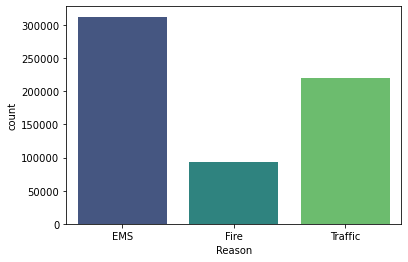

In [13]:
#sns.set(color_codes='WhiteGrid')
sns.countplot(x='Reason',data=df,palette='viridis')

##### Convert the timeStamp attribute from dtype object to DateTime Object

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
627052   2020-04-10 08:01:34
627053   2020-04-10 08:10:28
627054   2020-04-10 08:29:17
627055   2020-04-10 08:43:45
627056   2020-04-10 08:42:46
Name: timeStamp, Length: 627057, dtype: datetime64[ns]

In [15]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:10:52')

In [16]:
time.hour

17

In [17]:
time.month

12

In [18]:
time.dayofweek

3

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day_of_Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [20]:
df['Day_of_Week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

#### Now the day of week is an integer in the range 0-6. Use the dictionary
#### To map these integers to the actual name of the day of week using
#### dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627057 entries, 0 to 627056
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          627057 non-null  float64       
 1   lng          627057 non-null  float64       
 2   desc         627057 non-null  object        
 3   zip          550638 non-null  float64       
 4   title        627057 non-null  object        
 5   timeStamp    627057 non-null  datetime64[ns]
 6   twp          626788 non-null  object        
 7   addr         627057 non-null  object        
 8   e            627057 non-null  int64         
 9   Reason       627057 non-null  object        
 10  Hour         627057 non-null  int64         
 11  Month        627057 non-null  int64         
 12  Day_of_Week  627057 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 50.2+ MB


In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


#### Use seaborn to create a countplot of the Day_of_week column with the hue based off of the Reason column
#### style must be one of white, dark, whitegrid, darkgrid, ticks

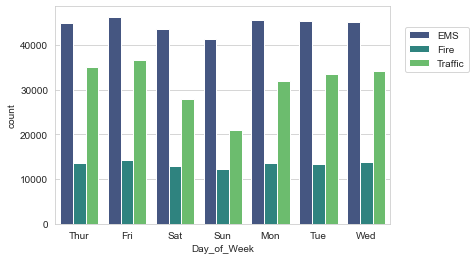

In [24]:
sns.set_style('whitegrid')
g = sns.countplot(x='Day_of_Week',data=df,hue='Reason',palette='viridis')
g.legend(loc='right', bbox_to_anchor=(1.25, 0.8), ncol=1)
plt.show()

#### Now do the same for Month

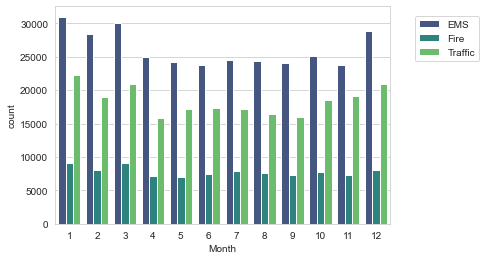

In [25]:
m = sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
# To relocate the legend
m.legend(loc='right',bbox_to_anchor=(1.28,0.85))

## Part 2
### Incase some of the months were missing ten we would solve the problem with a lin pllot

In [26]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,48050,48050,48050,42233,48050,48050,48036,48050,48050,48050,48050,48050
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467
6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


##### If the values were missing in the 'Month' column then we go for the 'lat' column and assume that if the lattitude value is present the cal actuaaly happened

In [27]:
byMonth['lat'].sum()

627057

In [28]:
len(df['lat'])

627057

##### Which implies that none of the values are missing in the Latitude column therefore it can be used to compare the total count of that particular month with th count plot

[(0.0, 63092.15)]

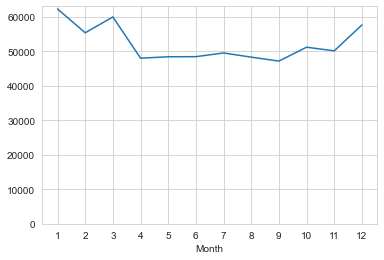

In [29]:
p = byMonth['lat'].plot()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
p.set(ylim=(0,None))

No handles with labels found to put in legend.


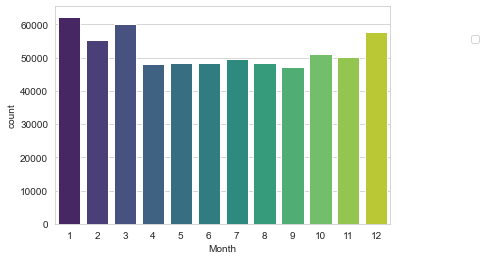

In [30]:
m = sns.countplot(x='Month',data=df,palette='viridis')
# To relocate the legend
m.legend(loc='right',bbox_to_anchor=(1.28,0.85))

##### The last two plots can be cleary compared 

##### Number of Calls per Month

In [31]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [32]:
import cufflinks as cf

In [33]:
init_notebook_mode(connected=True)

In [34]:
cf.go_offline()

In [35]:
sns.set_style('whitegrid')
g = byMonth.reset_index().iplot(kind='bar',x='Month',y='lat')

In [36]:
df.shape

(627057, 13)

#### Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


In [38]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10


In [40]:
byDate = df.groupby('Date').count()
byDate['lat'].head()

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
Name: lat, dtype: int64

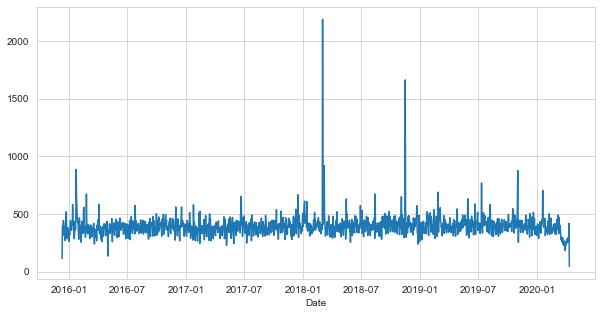

In [41]:
byDate['lat'].plot(figsize=(10,5))

In [42]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


In [44]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10


In [45]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Text(0.5, 1.0, 'EMS')

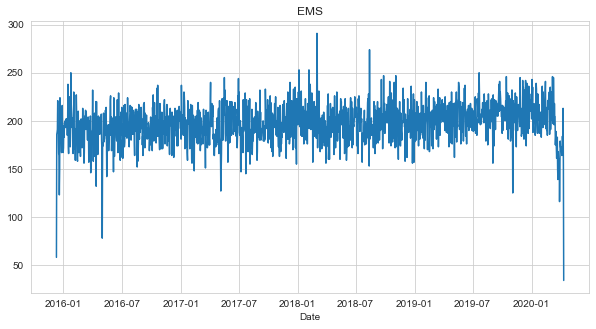

In [55]:
df_EMS = df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot(figsize=(10,5))
df_EMS.set_title('EMS')

Text(0.5, 1.0, 'Fire')

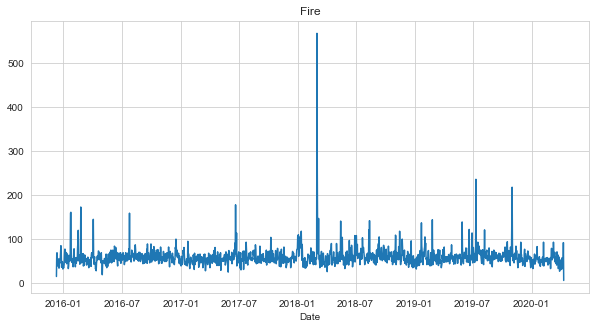

In [56]:
df_EMS = df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot(figsize=(10,5))
df_EMS.set_title('Fire')

Text(0.5, 1.0, 'Traffic')

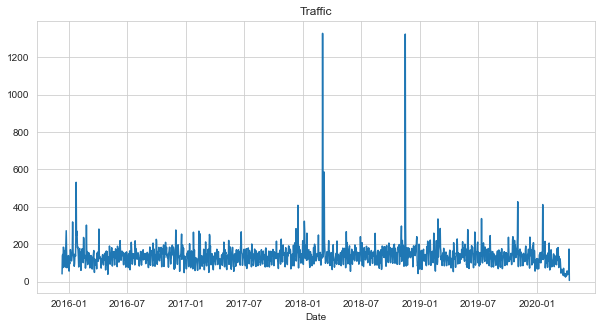

In [58]:
df_EMS = df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot(figsize=(10,5))
df_EMS.set_title('Traffic')

### HEATMAPS

In [65]:
dayhour = df.groupby(by=['Day_of_Week','Hour']).count()['Reason'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,1861,1528,1362,1237,1237,1551,2554,3976,4811,4995,...,6033,6645,6708,6776,5355,4768,4112,3663,3224,2693
Mon,1771,1465,1283,1193,1257,1736,2557,4259,5294,5442,...,5339,5841,6013,6103,5158,4239,3562,3056,2501,1954
Sat,2301,1947,1801,1501,1366,1483,1773,2380,3286,4098,...,5117,4887,4905,4926,4722,4496,3913,3677,3037,2805
Sun,2299,2034,1835,1520,1390,1388,1647,2275,2859,3531,...,4447,4215,4276,4261,4149,3930,3520,2954,2458,2183
Thur,1619,1315,1331,1165,1195,1676,2684,4274,5105,5119,...,5752,6145,6044,6632,5237,4439,3871,3303,2688,2226
Tue,1611,1364,1257,1147,1178,1654,2665,4230,5388,5304,...,5582,5944,6171,6588,5357,4339,3634,3222,2544,1999
Wed,1569,1392,1194,1190,1049,1513,2542,4477,5262,5186,...,5634,6135,6404,6686,5368,4440,3875,3322,2642,2085


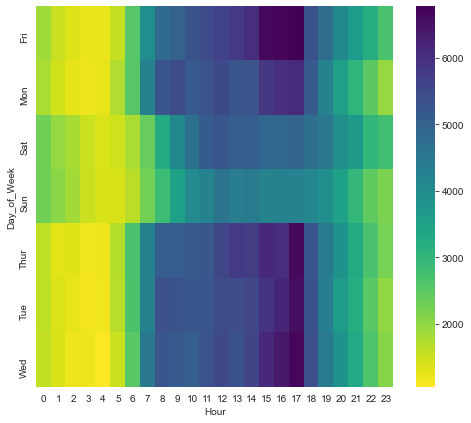

In [68]:
plt.figure(figsize=(8,7))
sns.heatmap(dayhour,cmap='viridis_r')

### Create  Cluster Map

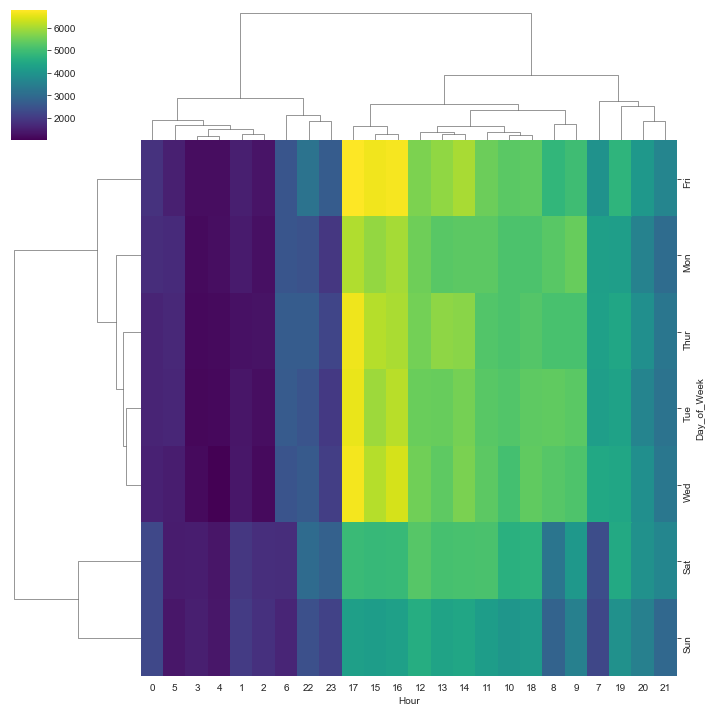

In [72]:
sns.clustermap(dayhour,cmap='viridis')

In [74]:
dayMonth = df.groupby(by=['Day_of_Week','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day_of_Week,,,,,,,,,,,,
Fri,9309,8255,10941,7226,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7465,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,6788,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6174,5410,5673,6567,5275,5956,6316,5196,7165
Thur,9055,7997,8849,6847,7524,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8372,6749,7835,6689,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8989,6801,7942,7055,6976,7984,6844,7876,7410,7682


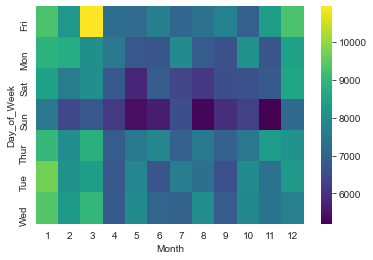

In [75]:
sns.heatmap(dayMonth,cmap='viridis')